In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Load data
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()
X_train, X_test = X_train / 255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000,)


In [3]:
# Number of classes
K = len(set(y_train))
print('No. of classes',K)

No. of classes 10


In [11]:
# Build model (Functional API)
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
X = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
X = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
X = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
X = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
X = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
X = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [12]:
# Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

In [14]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_each_epoch = X_train.shape[0] // batch_size
#r = model.fit(train_generator, validation_data=(X_test, y_test), epochs=50)
r = model.fit_generator(train_generator, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5865 - accuracy: 0.4152 - val_loss: 1.2269 - val_accuracy: 0.5657
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2154 - accuracy: 0.5640 - val_loss: 1.0225 - val_accuracy: 0.6320
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0542 - accuracy: 0.6248 - val_loss: 1.0152 - val_accuracy: 0.6481
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9545 - accuracy: 0.6636 - val_loss: 0.8552 - val_accuracy: 0.6973
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8872 - accuracy: 0.6873 - val_loss: 0.8364 - val_accuracy: 0.7140
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8418 - accuracy: 0.7049 - val_loss: 0.7600 - val_accuracy: 0.7354
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8078 - accuracy: 0.7184 - val_loss: 0.7779 -

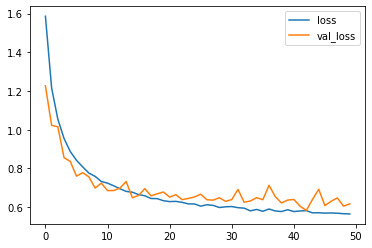

In [15]:
# Plot loss graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

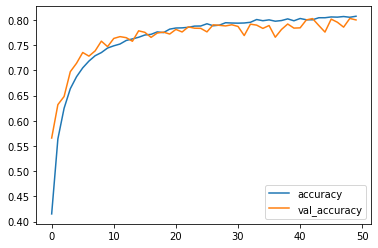

In [16]:
# Plot accuracy graph
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.6166 - accuracy: 0.8000
[0.6165681481361389, 0.800000011920929]


In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix without normalization
[[875  11  20   9   3   2   5   8  31  36]
 [  8 924   2   2   2   0   3   1   8  50]
 [ 71   4 686  49  58  31  52  32  10   7]
 [ 39   9  39 592  70  95  85  40  11  20]
 [ 19   2  33  35 785   8  46  63   6   3]
 [  8   3  36 157  37 639  41  60   5  14]
 [ 11   6  29  28  27  10 869   6   8   6]
 [ 14   1  15  24  34  20   6 873   4   9]
 [ 58  26   5   4   0   2   2   3 874  26]
 [ 22  66   4   5   1   2   3   6   8 883]]


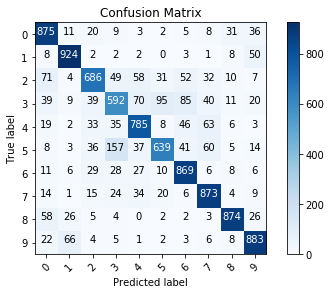

In [19]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
labels = """airplane
automobile
bird
cat
deer
dog
frog
horse
shop
truck
""".split()

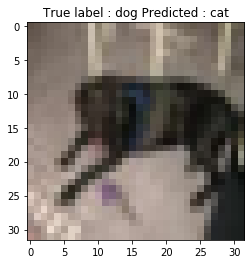

In [22]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label : %s Predicted : %s' % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         7385

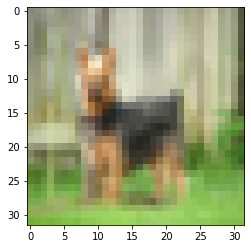

In [4]:
plt.imshow(X_test[24], cmap='gray')
plt.show()

In [5]:
X_test[24].shape

(32, 32, 3)